In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import csv

%matplotlib inline

In [44]:
def read_data(filename):
    gravity = 9.81
    _time = []
    _x = []
    _y = []
    _z = []
    
    with open(filename, 'r') as csv_file:
        read = csv.reader(csv_file, delimiter=',')
        next(read, None)
        for row in read:
            _time.append(float(row[0]))
            _x.append(float(row[1]))
            _y.append(float(row[2]))
            _z.append(float(row[3]))
            
    time = np.array(_time)
    x = np.array(_x) * gravity
    y = np.array(_y) * gravity
    z = np.array(_z) * gravity
    
    return time, x, y, z

We have data files insightN.csv, with N in [1, 2, 3, 4, 6]

### Looking at Trial 1

In [139]:
time, x, y, z = read_data('insight1.csv')

The slope of the samples isn't exactly linear, making the grpahs look more noisy than they should be

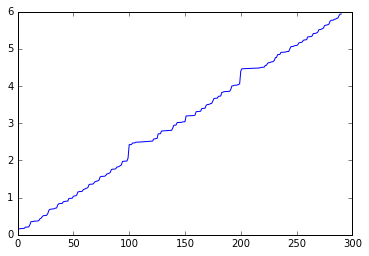

In [149]:
plt.plot(time)

Some correlation between X/Y and Z acceleration

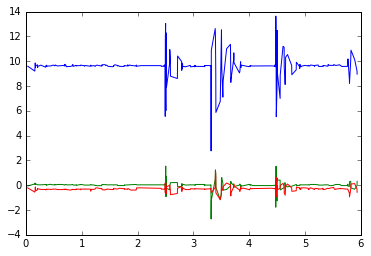

In [140]:
plt.plot(time, z)
plt.plot(time, y)
plt.plot(time, x)

In [47]:
z.mean()

9.6349707216494842

Center the data since we don't care about gravity

In [48]:
z = z - z.mean()

In [89]:
abs_x = abs(x)
abs_y = abs(y)
abs_z = abs(z)

In [56]:
thresh = np.ones(len(time)) * 3

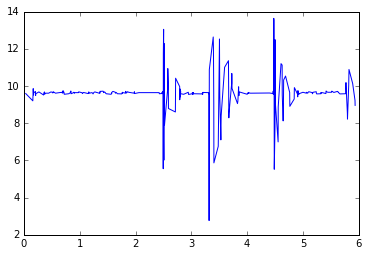

In [151]:
plt.plot(time, z)

We don't really care about the magnitude of acceleration since we expect oscillations

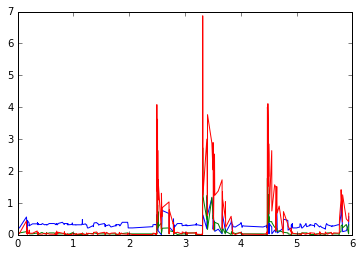

In [90]:
plt.plot(time, abs_x)
plt.plot(time, abs_y)
plt.plot(time, abs_z)

Combine X and Y

In [94]:
hori = np.sqrt(abs_x**2 + abs_y**2)

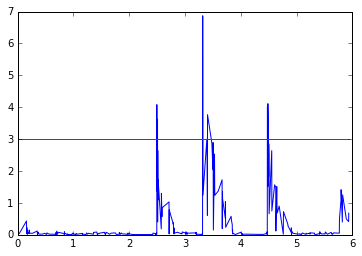

In [57]:
plt.plot(time, abs_z)
plt.plot(time, thresh)

Show all data points with acceleration above a threshold

In [54]:
time[abs_z > 3]

array([ 2.496,  2.503,  2.508,  3.318,  3.392,  3.404,  4.477,  4.48 ,
        4.486])

We can add a .5 second band to the plot after the knock starts

Pulses last for about 12ms, 86ms, 9ms

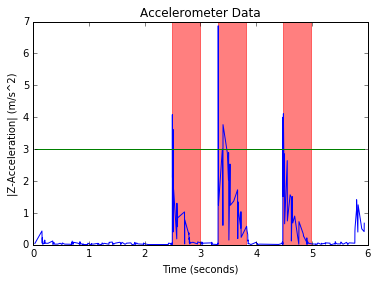

In [74]:
fig, ax = plt.subplots()
ax.plot(time, abs_z, time, thresh)
ax.axvspan(2.496, 2.496 + .500, alpha=0.5, color='red')
ax.axvspan(3.318, 3.318 + .500, alpha=0.5, color='red')
ax.axvspan(4.477, 4.477 + .500, alpha=0.5, color='red')
plt.title('Accelerometer Data')
plt.xlabel('Time (seconds)')
plt.ylabel('|Z-Acceleration| (m/s^2)')
plt.show()

Zoom in on more relevant portions of the graph

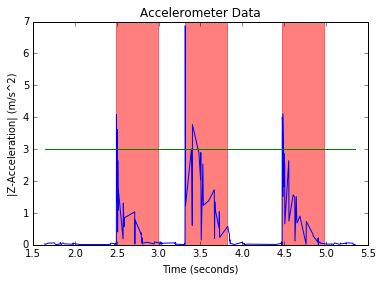

In [98]:
fig, ax = plt.subplots()
ax.plot(time[80:265], abs_z[80:265], time[80:265], thresh[80:265])
ax.axvspan(2.496, 2.496 + .500, alpha=0.5, color='red')
ax.axvspan(3.318, 3.318 + .500, alpha=0.5, color='red')
ax.axvspan(4.477, 4.477 + .500, alpha=0.5, color='red')
plt.title('Accelerometer Data')
plt.xlabel('Time (seconds)')
plt.ylabel('|Z-Acceleration| (m/s^2)')
plt.show()

Lets try and find some characteristics of the second pulse

In [80]:
second_pulse = (time >= 3.318) & (time <= 3.318 + .500)

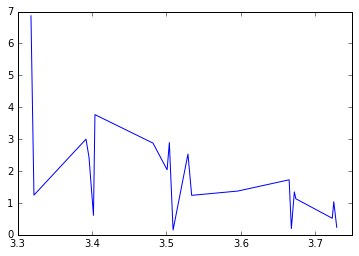

In [81]:
plt.plot(time[second_pulse], abs_z[second_pulse])

In [82]:
second_pulse.sum()

20

In [84]:
abs_z[second_pulse].mean()

1.8603114278350517

In [88]:
np.percentile(abs_z[second_pulse], 65)

2.1762692783505155

Longest pulse is about 20 samples, with relatively low mean

In [141]:
hori = hori - hori.mean()

In [144]:
to_plot = (abs_z - hori)[100:250]
time_plot = time[100:250]
time_plot = time_plot - time_plot[0]

Use a uniform range for the time samples, to de-noise the graph

In [160]:
time_axis = np.linspace(time_plot[0], time_plot[-1], num=len(time_plot))

Use the first spike point as the knock beginning

In [164]:
high_points = time_axis[to_plot > 3.2]
high_points

array([ 0.19681879,  0.23260403,  0.28628188,  1.1272349 ,  1.21669799,
        2.03975839,  2.09343624])

In [165]:
first_start = high_points[0]
second_start = high_points[3]
third_start = high_points[5]

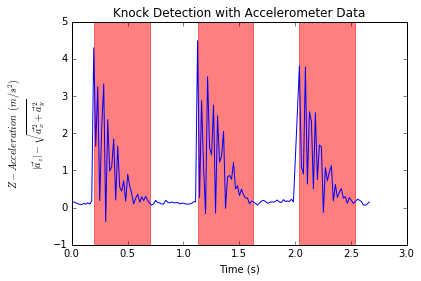

In [195]:
fig, ax = plt.subplots()
ax.plot(time_axis, to_plot)
ax.axvspan(first_start, first_start + .500, alpha=0.5, color='red')
ax.axvspan(second_start, second_start + .500, alpha=0.5, color='red')
ax.axvspan(third_start, third_start + .500, alpha=0.5, color='red')
plt.title('Knock Detection with Accelerometer Data')
plt.ylabel(r'$Z-Acceleration\/\/\/(m/s^2)$' +'\n' + r'$|\vec a_z| - \sqrt{\vec a_x^2 + \vec a_y^2}$')
plt.xlabel('Time (s)')

In [196]:
fig.savefig('knock.png', dpi=500)

Let's look at how non-linear the time slope is

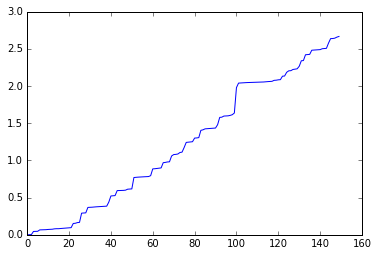

In [148]:
plt.plot(time_plot)

### Trial 6

In [169]:
time, x, y, z = read_data('insight6.csv')

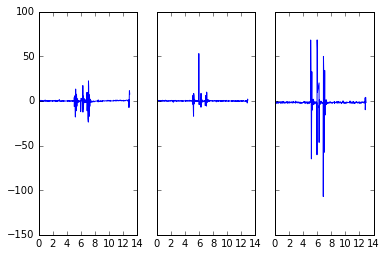

In [170]:
fig, ax = plt.subplots(1, 3, sharey='row')
ax[0].plot(time, x)
ax[1].plot(time, y)
ax[2].plot(time, z)

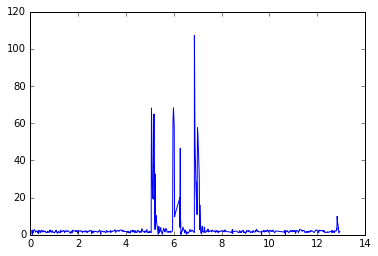

In [171]:
plt.plot(time, abs(z))

Results are no better than previous sample

In [172]:
relevant = (time > 4.75) & (time < 7.5)

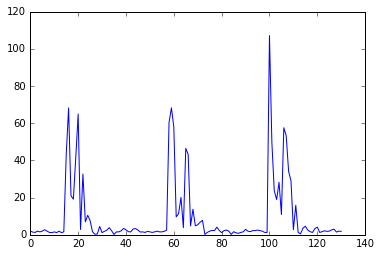

In [174]:
plt.plot(abs(z[relevant]))

### Trial 5

In [175]:
time, x, y, z = read_data('insight5.csv')

All knock patterns have relatively similar footprint

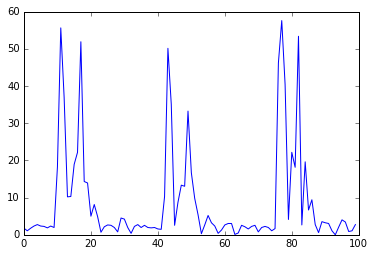

In [181]:
plt.plot(abs(z[250:350]))

### Walking around

In [182]:
time, x, y, z = read_data('test1.csv')

Let's look at some data recorded when walking around with the phone in pocket

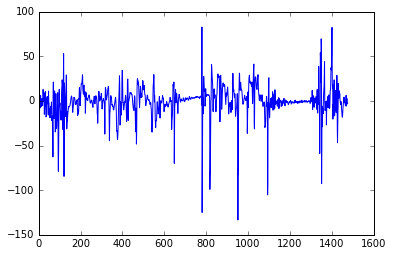

In [197]:
plt.plot(z)

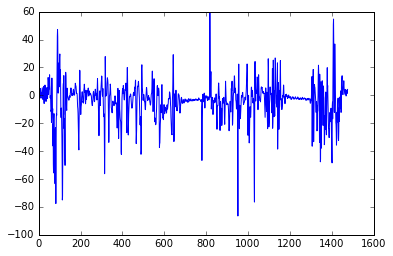

In [198]:
plt.plot(y)

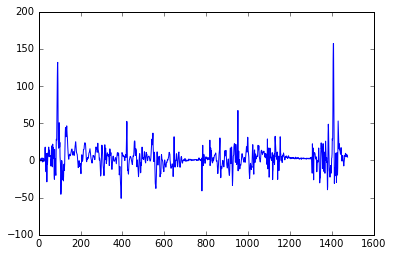

In [199]:
plt.plot(x)

Conclusion: The person can't be walking around, unless we integrate another data source. It's impossible to differentiate these knock spikes with the true positives.